In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv("cleaned_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Columns: 509 entries, ClientID to Churned
dtypes: float64(373), int64(136)
memory usage: 52.5 MB


In [4]:
features = df.drop(columns=['Churned'])
label = df["Churned"]
X_Train , X_Test , y_train , y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [5]:
KF = KFold(n_splits=5)
def Model_Train(Model, X, Y):
    Preds = []
    for i,j in KF.split(X):
        Train_X = X.iloc[i]
        Test_X = X.iloc[j]
        Train_Y = Y.iloc[i]
        
        Model.fit(Train_X, Train_Y)
        Pred_Y = Model.predict(Test_X)
        Preds.append(Pred_Y)
    print(classification_report(Y, np.concatenate(Preds)))

## Classification:

## KNN

In [6]:
from math import sqrt
Range = list(range(1, int(sqrt(len(X_Train))), 2))
Param_grid = dict(n_neighbors=Range)    
KNN = KNeighborsClassifier()    
Grid = GridSearchCV(KNN, Param_grid, cv=5, scoring='accuracy', verbose=3)
Grid.fit(X_Train, y_train)
best_k = Grid.best_params_['n_neighbors']
best_model = Grid.best_estimator_

y_pred = best_model.predict(X_Test)
print("Metrics: \n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.682 total time=   0.4s
[CV 2/5] END .....................n_neighbors=1;, score=0.689 total time=   0.2s
[CV 3/5] END .....................n_neighbors=1;, score=0.683 total time=   0.2s
[CV 4/5] END .....................n_neighbors=1;, score=0.674 total time=   0.2s
[CV 5/5] END .....................n_neighbors=1;, score=0.713 total time=   0.2s
[CV 1/5] END .....................n_neighbors=3;, score=0.681 total time=   0.2s
[CV 2/5] END .....................n_neighbors=3;, score=0.691 total time=   0.2s
[CV 3/5] END .....................n_neighbors=3;, score=0.702 total time=   0.2s
[CV 4/5] END .....................n_neighbors=3;, score=0.676 total time=   0.2s
[CV 5/5] END .....................n_neighbors=3;, score=0.688 total time=   0.2s
[CV 1/5] END .....................n_neighbors=5;, score=0.686 total time=   0.2s
[CV 2/5] END .....................n_neighbors=5

## Naive Bayes

In [7]:
NB = GaussianNB()
Model_Train(NB, X_Train, y_train)

y_pred = NB.predict(X_Test)
print("Metrics: \n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.34      0.50      7555
           1       0.38      0.95      0.54      3263

    accuracy                           0.52     10818
   macro avg       0.66      0.64      0.52     10818
weighted avg       0.77      0.52      0.51     10818

Metrics: 
               precision    recall  f1-score   support

           0       0.93      0.32      0.48      1901
           1       0.37      0.94      0.53       804

    accuracy                           0.51      2705
   macro avg       0.65      0.63      0.51      2705
weighted avg       0.76      0.51      0.50      2705



## CART

In [8]:
Cart = DecisionTreeClassifier()
Model_Train(Cart, X_Train, y_train)

y_pred = Cart.predict(X_Test)
print("Metrics: \n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7555
           1       1.00      1.00      1.00      3263

    accuracy                           1.00     10818
   macro avg       1.00      1.00      1.00     10818
weighted avg       1.00      1.00      1.00     10818

Metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1901
           1       1.00      1.00      1.00       804

    accuracy                           1.00      2705
   macro avg       1.00      1.00      1.00      2705
weighted avg       1.00      1.00      1.00      2705



[Text(0.6666666666666666, 0.9375, 'x[2] <= 0.5\ngini = 0.424\nsamples = 8655\nvalue = [6016, 2639]'),
 Text(0.5833333333333334, 0.8125, 'x[133] <= 0.5\ngini = 0.139\nsamples = 6505\nvalue = [6016.0, 489.0]'),
 Text(0.5, 0.6875, 'x[134] <= 0.5\ngini = 0.055\nsamples = 6190\nvalue = [6016, 174]'),
 Text(0.16666666666666666, 0.5625, 'x[56] <= 0.5\ngini = 0.0\nsamples = 4783\nvalue = [4782.0, 1.0]'),
 Text(0.08333333333333333, 0.4375, 'gini = 0.0\nsamples = 4690\nvalue = [4690, 0]'),
 Text(0.25, 0.4375, 'x[36] <= 0.5\ngini = 0.021\nsamples = 93\nvalue = [92, 1]'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]'),
 Text(0.3333333333333333, 0.3125, 'x[118] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.25, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4166666666666667, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.5625, 'x[123] <= 0.5\ngini = 0.216\nsamples = 1407\nvalue = [1234, 173]'),
 Text(0.75, 

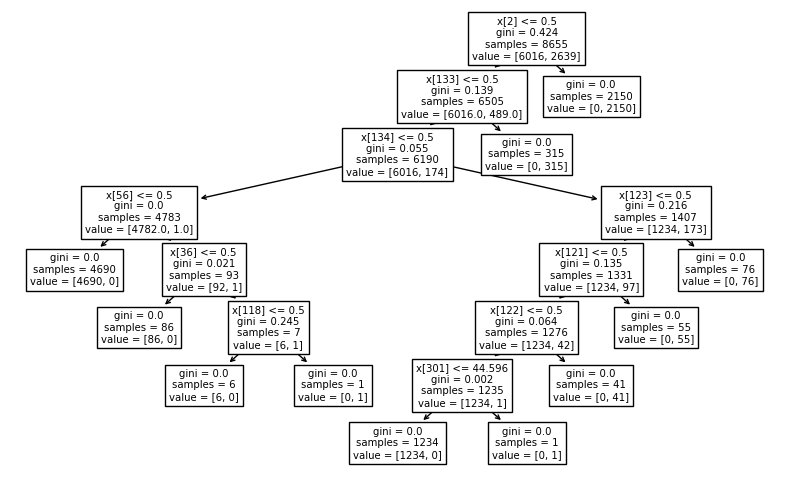

In [20]:
plt.figure(figsize=(10, 6))
plot_tree(Cart)

## Random Forest

In [9]:
RF = RandomForestClassifier(n_estimators=10, random_state=42)
Model_Train(RF, X_Train, y_train)

y_pred = RF.predict(X_Test)
print("Metrics: \n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7555
           1       1.00      0.90      0.95      3263

    accuracy                           0.97     10818
   macro avg       0.98      0.95      0.96     10818
weighted avg       0.97      0.97      0.97     10818

Metrics: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1901
           1       1.00      0.89      0.94       804

    accuracy                           0.97      2705
   macro avg       0.98      0.94      0.96      2705
weighted avg       0.97      0.97      0.97      2705



## Logistic Regression

In [21]:
LogR = LogisticRegression(solver='liblinear', max_iter=5000)
Model_Train(LogR, X_Train, y_train)

y_pred = LogR.predict(X_Test)
print("Metrics: \n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7555
           1       0.98      0.91      0.94      3263

    accuracy                           0.97     10818
   macro avg       0.97      0.95      0.96     10818
weighted avg       0.97      0.97      0.97     10818

Metrics: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1901
           1       0.99      0.90      0.94       804

    accuracy                           0.97      2705
   macro avg       0.97      0.95      0.96      2705
weighted avg       0.97      0.97      0.97      2705



## SVM

In [11]:
SVM = LinearSVC(dual=False, max_iter= 10000)
Model_Train(SVM, X_Train, y_train)

y_pred = SVM.predict(X_Test)
print("Metrics: \n", classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7555
           1       0.98      0.90      0.94      3263

    accuracy                           0.97     10818
   macro avg       0.97      0.95      0.96     10818
weighted avg       0.97      0.97      0.96     10818

Metrics: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1901
           1       0.98      0.89      0.93       804

    accuracy                           0.96      2705
   macro avg       0.97      0.94      0.95      2705
weighted avg       0.96      0.96      0.96      2705



In [12]:
print(y_pred.tolist())

[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

## Neural Network

In [13]:
early_stopping = EarlyStopping(monitor='loss', patience=5)

In [14]:
nn = Sequential()
nn.add(Dense(128, activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
for i,j in KF.split(X_Train):
        Train_X = X_Train.iloc[i]
        Val_X = X_Train.iloc[j]
        Train_Y = y_train.iloc[i]
        
        nn.fit(Train_X, Train_Y, epochs=200, batch_size=32, callbacks=[early_stopping])

Epoch 1/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6001 - loss: 83.0987
Epoch 2/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6666 - loss: 12.5778
Epoch 3/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6857 - loss: 2.2310
Epoch 4/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6999 - loss: 1.1838
Epoch 5/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7003 - loss: 0.7773
Epoch 6/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7141 - loss: 0.6009
Epoch 7/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7261 - loss: 0.5285
Epoch 8/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.5008
Epoch 9/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 0.5010
Epoch 10/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7465 - loss: 0.4796
Epoch 11/200
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7407 - loss: 0.4898
Epoch 12/200
271/271 ━━━━━━━━━━━━━━━━

In [16]:
y_pred = nn.predict(X_Test)

predictions = []
for pred in y_pred:
    if pred > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print("Metrics: \n", classification_report(y_test, predictions))

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Metrics: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.91      1901
           1       0.97      0.52      0.68       804

    accuracy                           0.85      2705
   macro avg       0.90      0.76      0.79      2705
weighted avg       0.87      0.85      0.84      2705



In [22]:
train_df = pd.concat([X_Train, y_train], axis=1)
test_df = pd.concat([X_Test, y_test], axis=1)

train_df.to_csv("TrainSet.csv")
test_df.to_csv("TestSet.csv")